In [26]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [20]:
data = pd.read_csv("../data/crabs.csv") 
data.head(10)
        

Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD
0           1  B   M      1   8.1   6.7  16.1  19.0   7.0
1           2  B   M      2   8.8   7.7  18.1  20.8   7.4
2           3  B   M      3   9.2   7.8  19.0  22.4   7.7
3           4  B   M      4   9.6   7.9  20.1  23.1   8.2
4           5  B   M      5   9.8   8.0  20.3  23.0   8.2
5           6  B   M      6  10.8   9.0  23.0  26.5   9.8
6           7  B   M      7  11.1   9.9  23.8  27.1   9.8
7           8  B   M      8  11.6   9.1  24.5  28.4  10.4
8           9  B   M      9  11.8   9.6  24.2  27.8   9.7
9          10  B   M     10  11.8  10.5  25.2  29.3  10.3

In [13]:
# Sélection des variables quantitatives et conversion en forme verticale
x=data.iloc[:,4:9].values

In [11]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [14]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)

In [15]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [16]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

In [17]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [18]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074

In [32]:
# Constitution de la matrice finale avec la variable qualitative sp et sex
finaldf = pd.concat([principaldf, data[['sex']], data[['sp']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sex sp
0         4.927573        -0.268445   M  B
1         4.386176        -0.094074   M  B

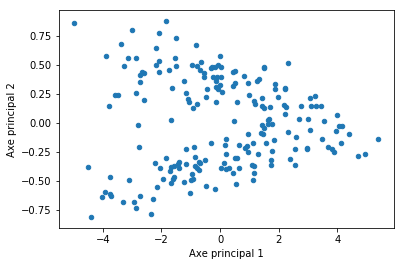

In [33]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [34]:
# Attribut pour rechercher les élements uniques d'une liste : sp
finaldf.sp.unique()

array(['B', 'O'], dtype=object)

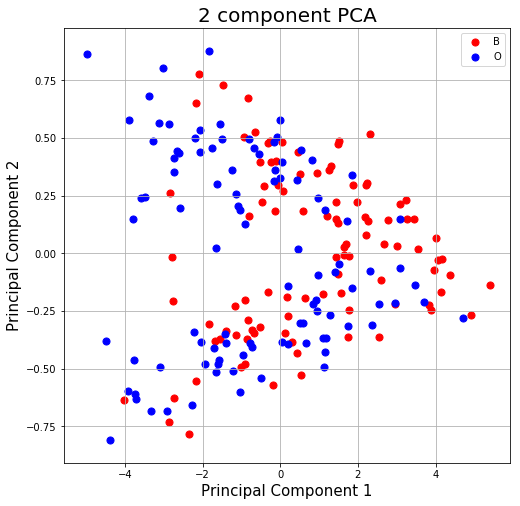

In [35]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sp'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.95776696, 0.03033704])

In [36]:
# Attribut pour rechercher les élements uniques d'une liste : sex
finaldf.sex.unique()

array(['M', 'F'], dtype=object)

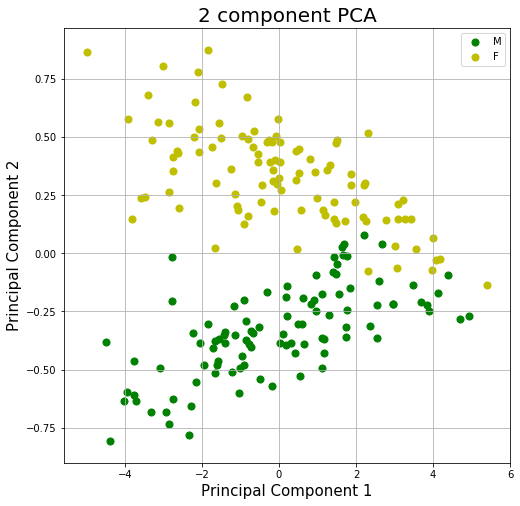

In [39]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'F']
colors = ['g', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [40]:
pca.explained_variance_ratio_

array([0.95776696, 0.03033704])

In [44]:
#Création de la colonne CAT qui permet de croiser les deux variables qualitatives sp et sex
data['CAT'] = np.where((data.sex=='F') & (data.sp =='O'), 'FO', (np.where((data.sex=='F') & (data.sp =='B'),'FB',(np.where((data.sex=='M') & (data.sp =='B'),'MB',(np.where((data.sex=='M') & (data.sp =='O'),'MO','N')))))))


In [42]:
data.head(10)

Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD CAT
0           1  B   M      1   8.1   6.7  16.1  19.0   7.0  MB
1           2  B   M      2   8.8   7.7  18.1  20.8   7.4  MB
2           3  B   M      3   9.2   7.8  19.0  22.4   7.7  MB
3           4  B   M      4   9.6   7.9  20.1  23.1   8.2  MB
4           5  B   M      5   9.8   8.0  20.3  23.0   8.2  MB
5           6  B   M      6  10.8   9.0  23.0  26.5   9.8  MB
6           7  B   M      7  11.1   9.9  23.8  27.1   9.8  MB
7           8  B   M      8  11.6   9.1  24.5  28.4  10.4  MB
8           9  B   M      9  11.8   9.6  24.2  27.8   9.7  MB
9          10  B   M     10  11.8  10.5  25.2  29.3  10.3  MB

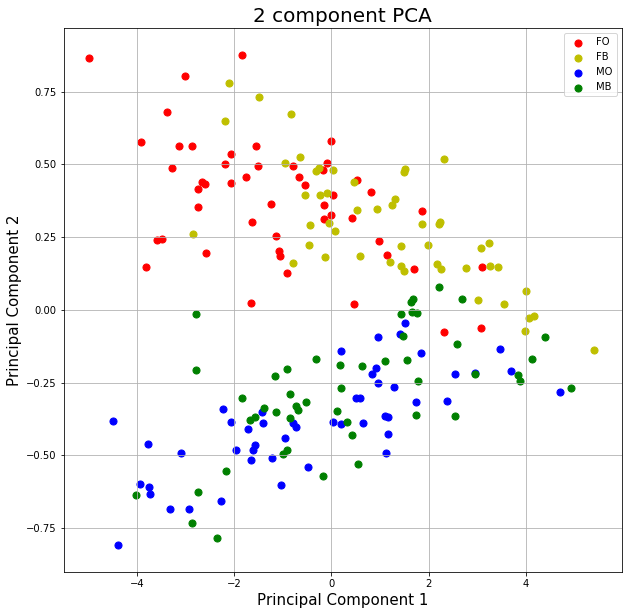

In [48]:
# Visualisation de la matrice avec prise en compte des deux variables quantitatives
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['FO', 'FB', 'MO', 'MB']
colors = ['r', 'y', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = data['CAT'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [50]:
import sklearn

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()

In [56]:
#on centre réduit
Z = sc.fit_transform(x)
Z

array([[-2.14623182e+00, -2.35244988e+00, -2.25392649e+00,
        -2.21777180e+00, -2.05798865e+00],
       [-1.94546178e+00, -1.96287468e+00, -1.97228249e+00,
        -1.98853816e+00, -1.94089947e+00],
       [-1.83073603e+00, -1.92391716e+00, -1.84554270e+00,
        -1.78477492e+00, -1.85308259e+00],
       [-1.71601029e+00, -1.88495963e+00, -1.69063850e+00,
        -1.69562851e+00, -1.70672111e+00],
       [-1.65864742e+00, -1.84600211e+00, -1.66247410e+00,
        -1.70836371e+00, -1.70672111e+00],
       [-1.37183306e+00, -1.45642691e+00, -1.28225470e+00,
        -1.26263163e+00, -1.23836441e+00],
       [-1.28578876e+00, -1.10580922e+00, -1.16959711e+00,
        -1.18622042e+00, -1.23836441e+00],
       [-1.14238158e+00, -1.41746939e+00, -1.07102171e+00,
        -1.02066279e+00, -1.06273064e+00],
       [-1.08501871e+00, -1.22268178e+00, -1.11326831e+00,
        -1.09707400e+00, -1.26763670e+00],
       [-1.08501871e+00, -8.72064099e-01, -9.72446308e-01,
        -9.06045967e-01

In [57]:
print(np.mean(Z,axis=0))

[ 3.55271368e-17  0.00000000e+00  3.55271368e-17 -1.77635684e-17
  0.00000000e+00]


In [58]:
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1.]


In [59]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

5


In [60]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]


In [61]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.9577669568722968, 0.030337041349040444, 0.00932659481804332, 0.0022270714294888414, 0.00034233553113074765]
